In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from data_util_KNN import readMnist#Mnist数据集
from data_util_PLA import creatData#从Mnist数据集里提取特征
from PLA import PLA, Pocket#导入PLA， Pocket模型

In [3]:
X_train, y_train, X_test, y_test = readMnist(r'E:\Code\jupyterpy\DigitalVideo\datasets\mnist')#Mnist数据集

##1.提取特征生成数据

In [3]:
X_tr, y_tr = creatData(X_train, y_train, 1, 9)#获取训练数据 这里分类 1， 9
X_te, y_te = creatData(X_test, y_test, 1, 9)#获取测试数据
print('训练：', X_tr.shape)
print('测试：', X_te.shape)

训练： (12691, 3)
测试： (2144, 3)


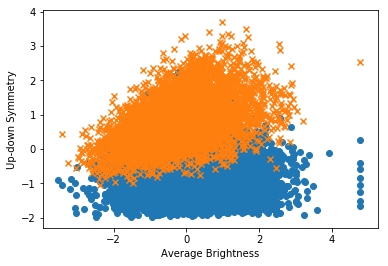

In [4]:
'''
可视化数据分布
'''
def show(X_tr, y_tr):
    plt.scatter(X_tr[np.where(y_tr==1)[0]][:, 1:2], X_tr[np.where(y_tr==1)[0]][:, 2:3])
    plt.scatter(X_tr[np.where(y_tr==-1)[0]][:, 1:2], X_tr[np.where(y_tr==-1)[0]][:, 2:3], marker='x')
    plt.xlabel('Average Brightness')#平均亮度
    plt.ylabel('Up-down Symmetry')#上下对称性
    plt.show()    
show(X_tr, y_tr)

In [5]:
W_init = np.random.rand(X_tr.shape[1], 1)#初始化权重
print(W_init)

[[ 0.76329247]
 [ 0.73423939]
 [ 0.97165419]]


##2.PLA训练

In [6]:
pla = PLA()
num_iters = 2000#迭代次数
W, W_records= pla.train(X_tr, y_tr, W_init, num_iters)#train函数有两个返回值：最后一次迭代得到的权重W和一个含有11个W历史数据的列表

In [7]:
print('train精度:', pla.pred(X_tr, y_tr, W))
print('test精度:', pla.pred(X_te, y_te, W))

train精度: 0.802931211094
test精度: 0.816231343284


In [8]:
def plotEinEout(X_tr, y_tr, X_te, y_te, Wr):#用来显示Ein, Eout
    E_in = []
    E_out = []
    for i in Wr:#用 W 的历史数据来计算Ein， Eout
        ei = (1 - pla.pred(X_tr, y_tr, np.array(i[1]).reshape(-1, 1))) * 100
        eo = (1 - pla.pred(X_te, y_te, np.array(i[1]).reshape(-1, 1))) * 100
        E_in.append(ei)
        E_out.append(eo)
    plt.figure(figsize=(10,10)) 
    ax0 = plt.subplot(221)#作图Ein
    ax0.plot(list(i[0] for i in Wr), E_in)
    plt.xlabel('iters')
    plt.ylabel('Error(%)')
    plt.legend(['Ein'], loc=0)
    ax1 = plt.subplot(222)#作图Eout
    ax1.plot(list(i[0] for i in Wr), E_out, c = 'y', marker='x')
    plt.xlabel('iters')
    plt.ylabel('Error(%)')
    plt.legend(['Eout'], loc=0)
    ax2 = plt.subplot(223)#Ein Eout放到一张图上
    ax2.plot(list(i[0] for i in Wr), E_in)
    ax2.plot(list(i[0] for i in Wr), E_out, c='y', marker='x')
    plt.xlabel('iters')
    plt.ylabel('Error(%)')
    plt.legend(['Ein', 'Eout'], loc=0)
    #ax0..scatter(list(range(len(testW))), testW, marker='x')
    #plt.show()
    return ax0

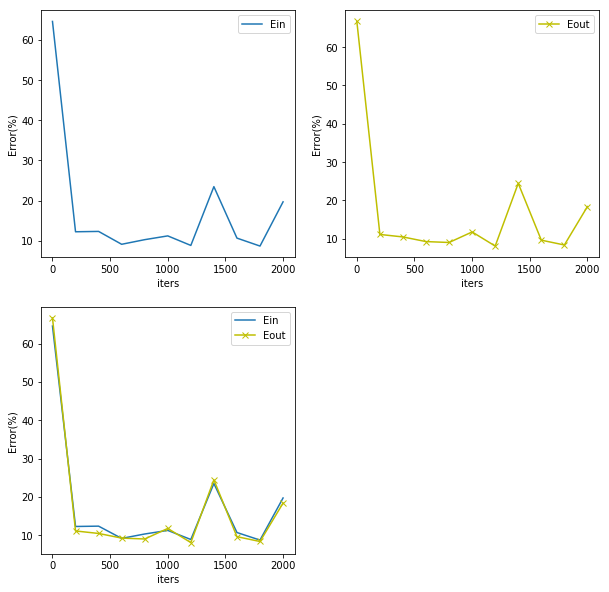

In [9]:
#查看Ein和Eout的变化
plotEinEout(X_tr, y_tr,X_te, y_te, W_records)
plt.show()

##3.Pocket训练

In [10]:
pocket = Pocket()
Wp, Wp_records= pocket.train(X_tr, y_tr, W_init, 2000)#train函数有两个返回值：在测试集上表现最好的W和一个元素是W的历史最好值的列表

In [11]:
print('train:', pocket.pred(X_tr, y_tr, Wp))
print('test:', pocket.pred(X_te, y_te, Wp))

train: 0.91332440312
test: 0.91651119403


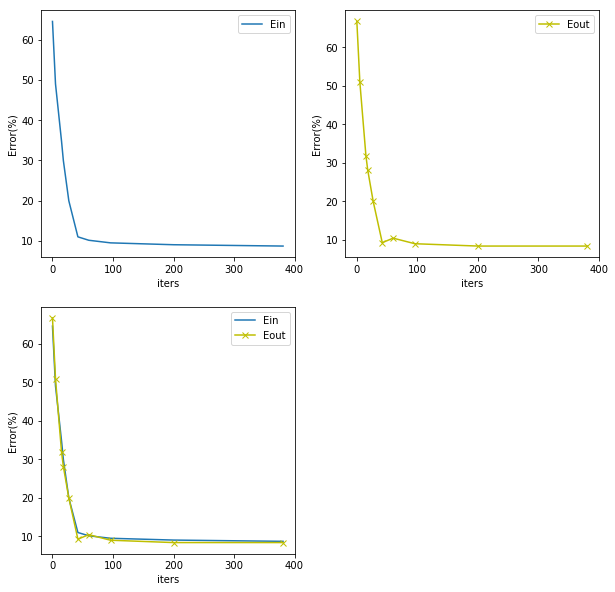

In [12]:
#查看Ein和Eout的变化
plotEinEout(X_tr, y_tr,X_te, y_te, Wp_records)
plt.show()

##4.OneStep LinearRegression

In [13]:
X_inv = np.linalg.inv(X_tr.T.dot(X_tr)).dot(X_tr.T)#伪逆

In [14]:
W_oslr = X_inv.dot(y_tr)#权重

In [15]:
print('train:', pla.pred(X_tr, y_tr, W_oslr))#计算用该方法得到的W在训练集上的准确率
print('test:', pla.pred(X_te, y_te, W_oslr))#计算用该方法得到的W在测试集上的准确率

train: 0.916633835001
test: 0.923041044776


##4.1 调用PLA

In [16]:
Wos, Wos_records= pla.train(X_tr, y_tr, W_oslr, 2000)

In [17]:
print('train:', pla.pred(X_tr, y_tr, Wos))#训练集上的准确率
print('test:', pla.pred(X_te, y_te, Wos))#测试集上的准确率

train: 0.914900323064
test: 0.925373134328


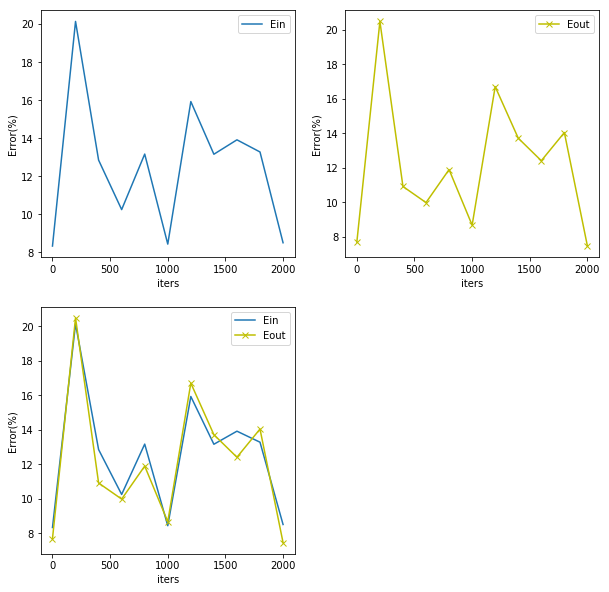

In [18]:
#查看Ein和Eout的变化
plotEinEout(X_tr, y_tr,X_te, y_te, Wos_records)
plt.show()

##4.2 调用Pocket

In [19]:
Wos, Wos_records= pocket.train(X_tr, y_tr, W_oslr, 2000)

In [20]:
print('train:', pocket.pred(X_tr, y_tr, Wos))#训练集上的准确率
print('test:', pocket.pred(X_te, y_te, Wos))#测试集上的准确率

train: 0.918288550942
test: 0.922108208955


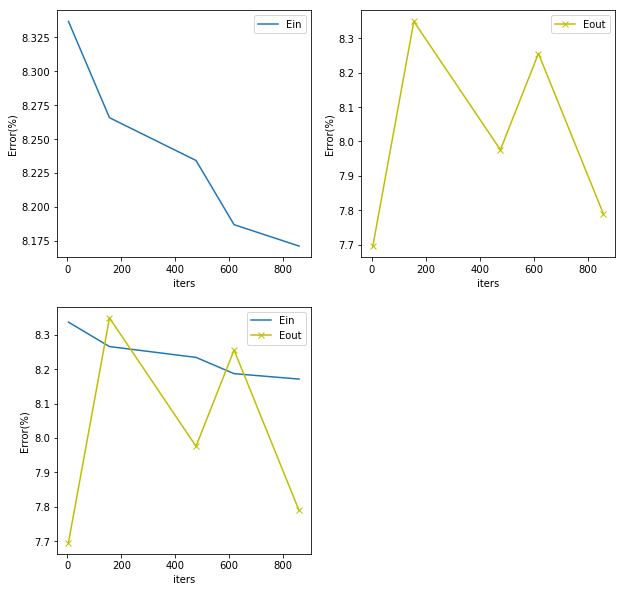

In [21]:
#查看Ein和Eout的变化
plotEinEout(X_tr, y_tr,X_te, y_te, Wos_records)
plt.show()